In [4]:
import os
import pandas as pd
import json
os.chdir("C:\\Users\\markc\\source\\datathon\\yelp_dataset")
jfiles = os.listdir()
print(jfiles)
infile = jfiles[2]
print(infile)

['Dataset_User_Agreement.pdf', 'map.html', 'yelp_academic_dataset_business.json', 'yelp_academic_dataset_checkin.json', 'yelp_academic_dataset_review.json', 'yelp_academic_dataset_tip.json', 'yelp_academic_dataset_user.json']
yelp_academic_dataset_business.json


In [6]:
#js = json.load(open(infile,'r',encoding='latin-1'))

In [7]:
fin = open(infile,'r',encoding='latin-1')
jsonlines = fin.readlines()
fin.close()
len(jsonlines)

150346

In [8]:
def getKeyList(jsonlines):
    keylist = list()
    for line in jsonlines:
        js = json.loads(line)
        keys = list(js.keys())
        for key in keys:
            if not key in keylist:
                keylist.append(key)
    return keylist
keylist = getKeyList(jsonlines)
len(keylist)
for key in keylist:
    print(key)

business_id
name
address
city
state
postal_code
latitude
longitude
stars
review_count
is_open
attributes
categories
hours


In [9]:
def makeDataFrameFromJSONLines(jsonlines):
    keylist = getKeyList(jsonlines)
    jdict = dict()
    for key in keylist:
        jdict[key] = list()
    for jline in jsonlines:
        js = json.loads(jline)
        for key in keylist:
            if key in js:
                jdict[key].append(js[key])
            else:
                jdict[key].append(None)
    return pd.DataFrame(jdict)
df = makeDataFrameFromJSONLines(jsonlines)

In [10]:
import json
import pandas as pd
data_file = open(infile,encoding='latin-1')
data = []
for line in data_file:
    data.append(json.loads(line))
df2 = pd.DataFrame(data)
data_file.close()

<Axes: >

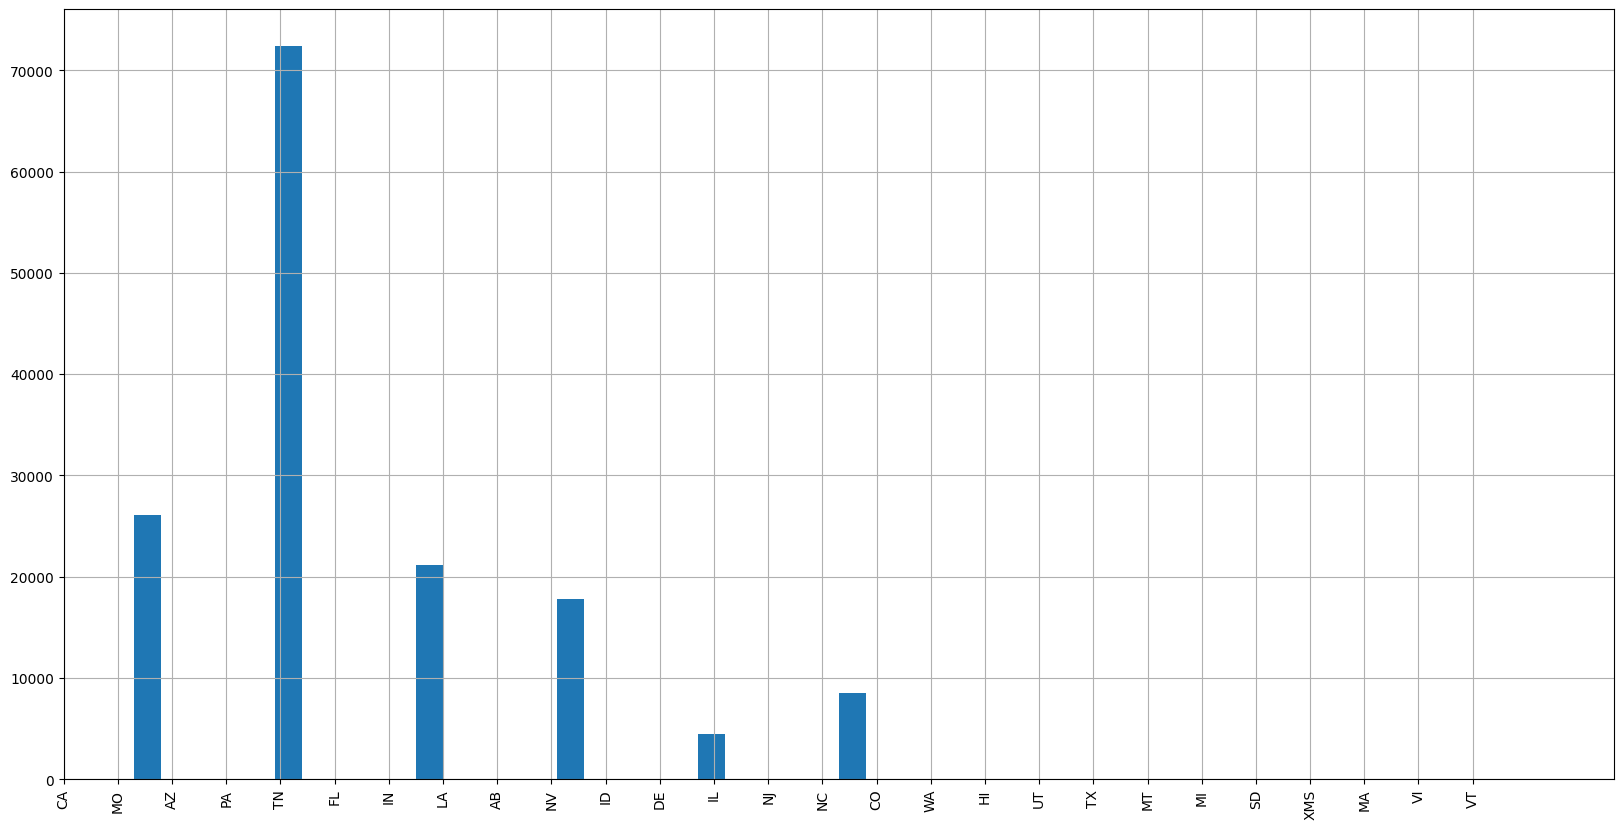

In [11]:
df2.state.hist(align='right', xrot=90, figsize=(20,10),width=0.5)

In [12]:
counts= list()
for index, state in enumerate(df[0:100].state):
    if index % 1000 == 0:
        print(index," ", end="")
    counts.append(df[df.state==state])
#df['state_count'] = counts

0  

In [13]:
import folium
import pandas as pd

#latitude = [37.7833, -122.4167, 37.3382, -121.8863]
#longitude = [-122.4167, 37.7833, -121.8863, 37.3382]

latitude = list()
longitude = list()
for index, entry in df[0:100].iterrows():
    latitude.append(entry.latitude)
    longitude.append(entry.longitude)
    m = folium.Map(location=[entry.latitude,entry.longitude])

for lat, lon in zip(latitude, longitude):
    folium.Marker([lat, lon],icon=folium.Icon(color="green", icon="flag")).add_to(m)

m.save('map.html')

In [16]:
#help(folium.Icon)

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

latitude = [37.7833, -122.4167, 37.3382, -121.8863]
longitude = [-122.4167, 37.7833, -121.8863, 37.3382]

m = Basemap(projection='merc', llcrnrlat=37.2, llcrnrlon=-122.8, urcrnrlat=38.2, urcrnrlon=-121.6, resolution='i')

x, y = m(longitude, latitude)

m.drawcoastlines(color='black')
m.drawstates(color='black')
m.drawrivers(color='blue')

m.scatter(x, y, s=50, c='red', marker='o')

plt.title('Map of the San Francisco Bay Area')
plt.show()

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'